# Clase 1: Repaso de sistemas, modelos, ecuaciones
Empezemos con un ejemplo motivador. En una fábrica un ingeniero en control se ve enfrentado con un problema: su jefe le asignó la tarea de estudiar cómo eliminar las oscilaciones observadas en el puente grúa. 

¿Qué es un puente grúa? Algo como esto:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1RejQCmOwp0j9ePkxnBuBkPLgog8hpZC7' />
<figcaption>Ejemplo de puente grúa</figcaption></center>
</figure>

Han observado, en la fábrica, que al elevar cargas con este dispositivo se presentan oscilaciones muy poco amortiguadas en la dirección vertical.

## Análisis del problema

Al ingeniero en control, llamado Ogata, se le ocurrió que para entender el problema debía armar un modelo físico-matemático de este dispositivo que le permitiera explicar el fenómeno, estudiarlo y proponer una solución.

La forma más simple de describir este sistema que se le ocurrió, y que justifique la existencia de oscilaciones, es la siguiente:

<figure>
<center>
<img src='https://drive.google.com/uc?id=11CYuWZTVN9ZOfMPnFxDfBg6nqwFUx9fY' />
<figcaption>Modelo del puente grúa</figcaption></center>
</figure>

Las ecuaciones matemáticas de este modelo salen de plantear las leyes físicas de cada elemento:

$$\sum_i F_i = M \frac{d^2y}{dt^2}$$

$$f + M g - K y - B \frac{d y}{d t} = M \frac{d^2y}{dt^2}$$

Con esta ecuación, llegamos al modelo matemático más simple al que recurrió Ogata.

**Ejercicio**

1. ¿Qué tipo de ecuación matemática es esta?
   
   una ecuacion diferencial de 2do orden, no homogenea debido a f.

2. ¿Es lineal el sistema descripto con dicha ecuación?

    no es lineal


Una herramienta de análisis que Ogata viene usando desde que estudió Ingeniería Electrónica en la FIUBA es la función de transferencia. ¿Te acordás de dónde salía y qué utilidad tenía?

**Ejercicio** 

Es hora de agarrar papel y lápiz. Desarrollá la ecuación de transferencia para el modelo de Ogata. ¿Cuál creés que es la entrada y cuál sería la salida?

Deberías llegar a la siguiente ecuación:

$$ H(s) =  \frac{Z(s)}{F(s)} = \frac{1/M}{s^2 + \frac{B}{M}s+ \frac{K}{M}}$$

Donde

 $$Z(s) = \mathscr{L}\{z(t)\} $$
 
es la transformada de Laplace de los desplazamientos del centro de masa del puente grúa, respecto del punto de equilibrio. Es decir:

$$ z = y - y_{equilibrio}$$

Y 

 $$F(s) = \mathscr{L}\{f(t)\} $$

es la transformada de Laplace de la fuerza aplicada al dispositivo.

**RTA:**

a partir de la ecuacion diferencial 
$$f + M g - K y - B \frac{d y}{d t} = M \frac{d^2y}{dt^2}$$ 
transformo con Laplace para encontrar la transferencia a condiciones iniciales nulas y teniendo en cuenta que resuelvo en el equilibrio : 
$$ F(s) -K.Z - B.S.Z= MS^2.Z $$ 
reagrupando 
$$ F(s) = (MS^2 + K + B.S)Z(s)$$ 
y finalmente se obtiene el H(s).
$$ H(s) = \frac{1}{MS^2 + K + B.S}$$
A modo de repaso de las herramientas básicas de análisis que un ingeniero en Control debe conocer, y para practicar el uso de las bibliotecas de Control en Python, vamos a empezar por ingresar el modelo y simularlo. 

Para trabajar con la biblioteca de funciones dedicadas al control, y todas las herramientas de simulación en python, necesitamos importarlas:


In [4]:
!pip install control 
# No es un paquete de python que venga instalado por defecto, por eso, agregamos la posibilidad de instalarlo!
import control as ctrl
import numpy as np 
# Numpy es la biblioteca de computos científicos más usada en pyhon
import matplotlib.pyplot as plt 
# Matplotlib es la biblioteca que nos va a permitir graficar

Algunos recursos para tener en cuenta:

https://python-control.readthedocs.io/en/0.8.3/intro.html

https://numpy.org/devdocs/user/quickstart.html

https://matplotlib.org/tutorials/index.html

El siguiente bloque define dentro de este Notebook, los valores de los parámetros del modelo:

In [5]:
# Definición de valores de parámetros del modelo
M = 0.3 # kg
K = 0.03 # N/m
B = 0.3 # Ns/m
print('El sistema tiene una masa de {:f} kg, constante elástica de {:f} N/m y coeficiente de roce viscoso {:f} Ns/m.'.format(M,K,B))

El sistema tiene una masa de 0.300000 kg, constante elástica de 0.030000 N/m y coeficiente de roce viscoso 0.300000 Ns/m.


Ingresamos la definición del sistema de acuerdo a la función de transferencia hallada:

In [6]:
numerador = np.array([1/M])
denominador = np.array([1, B/M, K/M])                #(a.S**2 + b.S + c)
sistema = ctrl.tf(numerador, denominador)            #tf(num, den[, dt])	Create a transfer function system.
print(sistema)


    3.333
-------------
s^2 + s + 0.1



A partir de esta definición, es muy simple calcular y graficar la respuesta al impulso, o la respuesta al escalón. A continuación lo resolvemos:

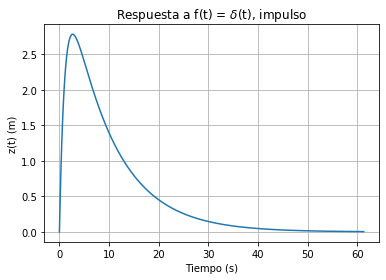

In [7]:
tiempo, z = ctrl.impulse_response(sistema)      #T, yout, xout= impulse_response(sys[, T, X0, input, …])	Impulse response of a linear system
plt.plot(tiempo, z)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = $\delta$(t), impulso')
plt.grid()
plt.show()

**Para probar:** Si quisieras elegir los tiempos de simulación para la respuesta el impulso, deberías pasarle un array a la función impulse_response(). 
Revisá su documentación de la siguiente forma:

`ctrl.impulse_response?`

en un diálogo de código e intentá elegir simular para los tiempos que desees.

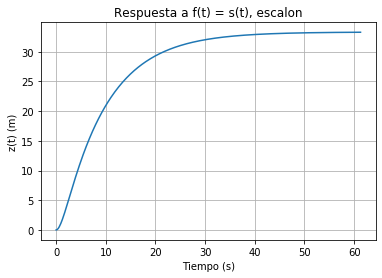

In [8]:
tiempo, z = ctrl.step_response(sistema)      #step_response(sys[, T, X0, input, output, …])	Step response of a linear system
plt.plot(tiempo, z)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), escalon')
plt.grid()
plt.show()

Por último, otras herramientas muy utilizada también, son el diagrama de bode o de respuesta en frecuencia del sistema, y el diagrama de polos y ceros. Ambos simulados a continuación:

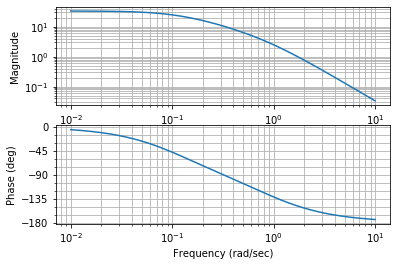

In [7]:
mag, phase, omega = ctrl.bode_plot(sistema)

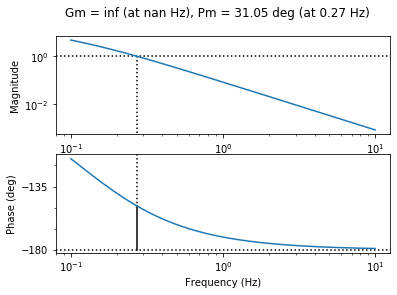

In [14]:
limites= (0.1, 10)
mag, phase, omega = ctrl.bode_plot(sistema, Hz= True, margins= True, omega_limits= limites)
#aca esta en frecuencia

**Para probar:** Utiliza la ayuda de la función bode_plot() para graficar en función de la frecuencia en Hz. Además, explora la forma de seleccionar las frecuencias a simular.

El sistema tiene polos en s1 =  -0.8872983346207417 y s2 = -0.11270166537925831 y no tiene ceros finitos.


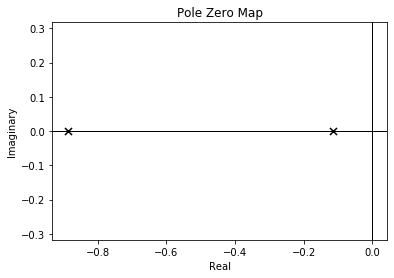

In [9]:
ctrl.pzmap(sistema)                             #control.pzmap(sys, Plot=True, grid=False, title='Pole Zero Map')
polos = ctrl.pole(sistema)
ceros = ctrl.zero(sistema)
print('El sistema tiene polos en s1 =  {} y s2 = {} y no tiene ceros finitos.'.format(polos[0],polos[1]))

Para completar el modelo, Ogata incluye la señal de perturbación que estima que proviene de la carga del puente grúa, y que tiene la siguiente forma:

$$ f = A sen(\omega t)$$

Con $$A = 1~N$$ y $$\omega = 90~rad/s$$

## Tarea:

**Ejercicio 1**

Resuelva la respuesta del sistema a dicha perturbación y comparela con la solución cargada. Puede resolverlo mediante simulación como se indica a continuación:

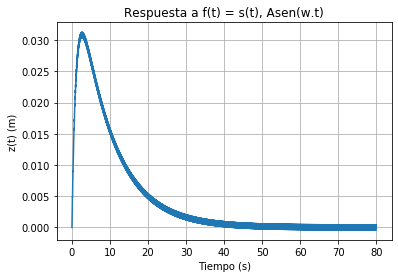

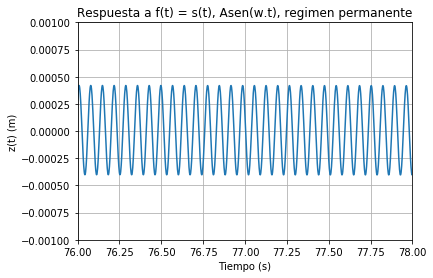

In [10]:
# Ejercicio de simulación: Ingrese acá su código de simulación para hallar z(t) con la f(t) propuesta por Ogata
A = 1        #N
omega = 90   #rad/s  
# Tip: https://python-control.readthedocs.io/en/0.8.3/generated/control.forced_response.html#control.forced_response

t0=0
t1=80
nt= 50000
t= np . linspace ( t0 , t1 , nt )

f= A*np.sin(omega*t)
t, zout= ctrl.forced_response(sistema,t, f )
# Respuesta a la perturbacion senoidal, la solucion forzada.
plt.plot(t, zout)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), Asen(w.t)')
plt.grid()
plt.show()

#Solucion forzada entre los 76 a 78 segundos.
plt.plot(t, zout)
plt.ylim([-0.001, 0.001])
plt.xlim([76, 78])
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), Asen(w.t), regimen permanente')
plt.grid()
plt.show()
# Aquí va tu código!

**Ejercicio 2**

¿Cómo simularía o calcularía la respuesta en régimen permanente? Explique.


**RTA:**

Por lo general para calcular la respuesta en régimen permanente se usa el teorema de valor final:
$$ f(\infty)= Lim_{t-> \infty} f(t)= Lim_{S-> 0} S.F(S) $$ 
pero este sirve cuando hay un valor final, y **este no es el caso**. por lo que se puede ver en el grafico de arriba que en el regimen permanente oscila de forma senoidal.

Después de observar la respuesta del modelo y contrastar con las mediciones y observaciones del puente grúa en cuestión, Ogata investigó cómo podía mejorar dicha situación. En resumen, se planteó un objetivo:

<center>"Quiero que esta señal de perturbación, que es similar a la que aparece en el puente grúa, se atenúe lo más posible" </center>

y luego, lo tradujo a un requerimiento matemático para el modelo como:

$$z(t)\xrightarrow[t \rightarrow \infty]{} 0.$$

Para lograr este objetivo, Ogata encontró algo que se denomina un amortiguador de masa. El modelo final, con el amortiguador de masa se puede observar a continuación:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1g7-8L4t3vLFzqzw9KAcDdzvXkujEKrcs' />
<figcaption>Modelo del puente grúa con amortiguador</figcaption></center>
</figure>



**Ejercicio 3**

Hallar el modelo matemático del puente grúa con amortiguador de masa y hallar la nueva función de transferencia.

Verificar el resultado de Ogata:

$$\frac{Z(s)}{F(s)} = \frac{1}{M} \frac{s^2+K_a/M_a}{s^4+ \frac{B}{M} s^3 + (\frac{K_a}{M_a}+\frac{K}{M}+\frac{K_a}{M}) s^2 + \frac{B K_a}{M M_a} s + \frac{K K_a}{M M_a}}$$

Dada la masa $M_a$ = 0,03 kg, Ogata pretende diseñar el amortiguador de masa, es decir, elegir $K_a$ para que se cumpla el objetivo planteado anteriormente.

**RTA:**

Nuevamente se trabaja en el equilibrio
$$1) M\ddot{y_1}= F - Ky_1 - B\dot{y_1} - K_a(y_1 - y_2)$$
$$2) M_a\ddot{y_2}= -K_a(y_2 - y_1)$$

Tranformo con Laplace y reordeno:
$$ F= (MS^2 + K + SB)Y_1 + K_a(Y_2 - Y_1) $$
$$ 0= M_a S^2 Y_2 + K_a (Y_2 - Y_1)        \rightarrow  Y_2= \frac{K_a}{M_a S^2 + K_a} $$

reemplazando $Y_2$:
$$ F= (MS^3 + K +SB)Y_1 -K_a Y_1 + K_a \frac{Ka Y_1}{M_a S^2 + K_a} $$
$$ F= \frac{MM_a S^4 + M_a K S^2 + M_aBS^3 + MK_as^2 + K K_a + S B K_a -K_a M_a S^2 - Ka^2 + Ka^2}{M_a S^2 + K_a} Y_1 $$

reorganizando un poco mas y haciendo un cambio de z:
$$\frac{Z(s)}{F(s)} = \frac{1}{M} \frac{s^2+K_a/M_a}{s^4+ \frac{B}{M} s^3 + (\frac{K_a}{M_a}+\frac{K}{M}+\frac{K_a}{M}) s^2 + \frac{B K_a}{M M_a} s + \frac{K K_a}{M M_a}}$$

QUEDO UN TERMINO NEGATIVO!!! -K_a/M PREGUNTAR QUE PEDO!!!!




**Ejercicio 4**

Ayude a Ogata a encontrar el valor de $K_a$. Repita el análisis pero ahora del sistema completo con el amortiguador de masa y el valor de $K_a$ encontrado para verificar que el objetivo se cumple.


1. Defina el sistema amortiguado. Calcule $K_a$.
2. Grafique y analice la respuesta al impulso.
3. Grafique y analice la respuesta al escalón.
4. Grafique y analice el diagrama de Bode.
5. Grafique y analice el diagrama de polos y ceros.
6. Grafique y analice la respuesta transitoria para la  f(t) dada.
7. Grafique y analice la respuesta en régimen permanante para la f(t) dada.


**RTA**

Dado que el teorema de valor final vale cuando se tiene un valor final, no sep uede usar en este caso.
entonces solo queda ver la funcion transferencia y buscar $K_a$ de forma tal que se **anule** la perturbacion en regimen permanente:

$$\frac{Z(s)}{F(s)} = \frac{1}{M} \frac{s^2+K_a/M_a}{s^4+ \frac{B}{M} s^3 + (\frac{K_a}{M_a}+\frac{K}{M}+\frac{-K_a}{M}) s^2 + \frac{B K_a}{M M_a} s + \frac{K K_a}{M M_a}} = 0$$
entonces el numerador sera:
$$ s^2+K_a/M_a = 0   \rightarrow  K_a= -S^2.M_A $$ 
entonces $$K_a= -(jw)^2.M_a= w^2.M_a=(90rad/s)^2.M_a $$
$$ K_a= 243 $$




        3.333 s^2 + 2.7e+04
-----------------------------------
s^4 + s^3 + 8910 s^2 + 8100 s + 810



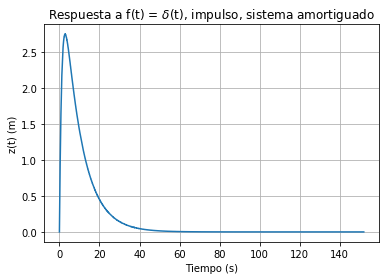

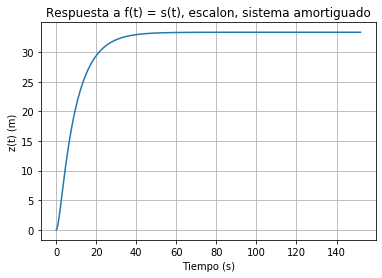

In [11]:
# Ejercicio de simulación:
Ma = 0.03  # kg
Ka = 243   #omega^2*Ma 

# Defina el sistema
#numerador2 = (1/M)*[1 0 (Ka/Ma)];
#denominador2 = [1 B/M  (Ka/Ma + K/M + Ka/M) ((B*Ka)/(M*Ma)) ((K*Ka)/(M*Ma))];

numeradorAMR = np.array([1/M, 0, ( Ka/(M*Ma) )])
denominadorAMR = np.array([1, B/M,  (Ka/Ma + K/M + Ka/M), ((B*Ka)/(M*Ma)), ((K*Ka)/(M*Ma))])                #(a.S**2 + b.S + c)
sistemaAMR = ctrl.tf(numeradorAMR, denominadorAMR)            #tf(num, den[, dt])	Create a transfer function system.
print(sistemaAMR)

# Respuesta al impulso

tiempoAMR, z2 = ctrl.impulse_response(sistemaAMR)      #T, yout, xout= impulse_response(sys[, T, X0, input, …])	Impulse response of a linear system
plt.plot(tiempoAMR, z2)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = $\delta$(t), impulso, sistema amortiguado')
plt.grid()
plt.show()

# Respuesta al escalón
tiempoAMR, z2 = ctrl.step_response(sistemaAMR)      #step_response(sys[, T, X0, input, output, …])	Step response of a linear system
plt.plot(tiempoAMR, z2)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), escalon, sistema amortiguado')
plt.grid()
plt.show()




(70, 100)

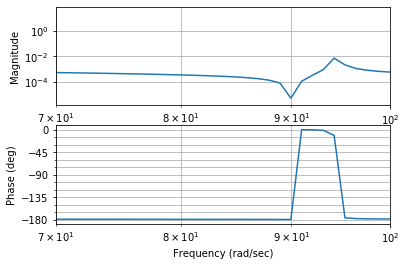

In [12]:
# Diagrama de Bode
mag, phase, omega = ctrl.bode_plot(sistemaAMR)
plt.xlim([70, 100])



Se puede observar que en 90 rad/s es donde la magnitud del bode decrece, es decir que mata la frecuencia, esto es similar a un filtro Noch como los vistos en ADC.
Con esto se consigue atenuar la oscilacion en regimen permanente.

El sistema tiene polos en s1 =  (-0.04545125705060565+94.39239580122363j) , s2 = (-0.04545125705060565-94.39239580122363j), s3 =  (-0.7947027057034085+0j) y s4 = (-0.11439478019537752+0j) .


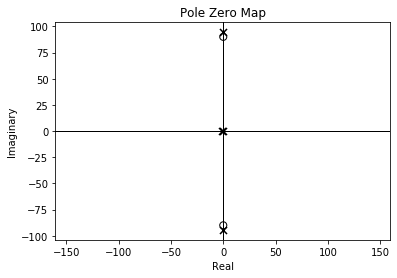

In [14]:
# Diagrama de polos y ceros
ctrl.pzmap(sistemaAMR, Plot = True)                             #control.pzmap(sys, Plot=True, grid=False, title='Pole Zero Map')

polos = ctrl.pole(sistemaAMR)
ceros = ctrl.zero(sistemaAMR)
print('El sistema tiene polos en s1 =  {} , s2 = {}, s3 =  {} y s4 = {} .'.format(polos[0],polos[1],polos[2],polos[3]))

In [15]:
ceros

array([-0.+90.j,  0.-90.j])

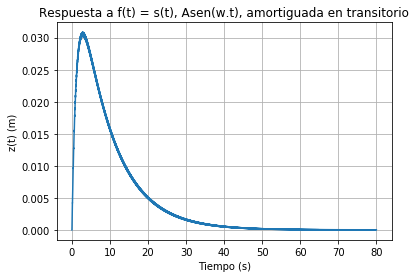

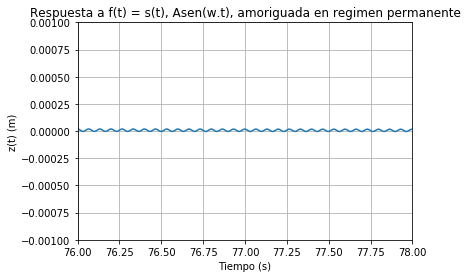

In [42]:
# Respuesta transitoria con f(t) dada

t_AMR, zout_AMR= ctrl.forced_response(sistemaAMR,t, f )

plt.plot(t_AMR, zout_AMR)
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), Asen(w.t), amortiguada en transitorio')
plt.grid()
plt.show()

# Respuesta en régimen permanente con f(t) dada

plt.plot(t_AMR, zout_AMR)
plt.ylim([-0.001, 0.001])
plt.xlim([76, 78])
plt.ylabel('z(t) (m)')
plt.xlabel('Tiempo (s)')
plt.title('Respuesta a f(t) = s(t), Asen(w.t), amoriguada en regimen permanente')
plt.grid()
plt.show()



Se observa que a comparacion del sistema original(sin amortiguador) este se ve notablemente disminuida la oscilacion por lo que se puede decir que amortigua a la recuencia de 90 rad/s en regimen permanente.